This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 10 embryo particles with calculated initial status according to the hypothesis, whose mass are $3M_{\oplus}$ respectively.

After that we, considering the collision and merger, integrate the system for a preinstall long time units and plot the figure.

In [1]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e3*2.*np.pi

#np.random.seed(12)

In [2]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [3]:
# Embryos
# 行星胚胎群 a = 8 AU
n_embryos = 10
e = random.randint(1,10)*0.001*np.pi/180
inc = random.randint(1,10)*0.001*np.pi/180
Omega = random.randint(0,360)*np.pi/180
omega = random.randint(0,360)*np.pi/180
m = 3*3.040432648022642e-06
rho = 3
r = (((m*1.988e33)/(4*np.pi))**(1/3))/1.4960e13
a_default = 6 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.7 * hillradii + 8 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, inc = inc, Omega = Omega, omega = omega, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [4]:
sim.status()
print(r)

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	13
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f648a338a60, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f648a338840, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7f648a338a60, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7f648a338840, m=9.121297944067926e-06 x=3.9368820858321096 y=6.463832545628026 z=0.000357005663718969 vx=-0.31079817804795845 vy=0.18967244660957308 vz=-8.257404298386154e-06>
<rebound.particle.Particle object at 0x7f648a338a60, m=9.121297944067926e-06 x=-7.615423582952581 y=0.282862640507594 z=-0.0003265512944

In [5]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06


In [6]:
sim.move_to_com()
E0 = sim.calculate_energy()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-h8qwbe6p because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


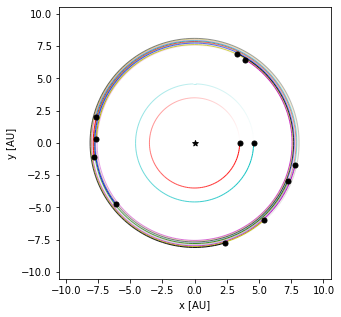

In [7]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [8]:
sim.getWidget(size=(500,300),scale=2.0*a_saturn)

Widget(N=13, count=2, height=300.0, orbit_data=b'5}\x98\xbb\xd2`\xa38t\xb3\x021\x00\x00`@M\xc9_%\xdb\x0fI@\xdb…

In [9]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

2.4935524215618834e-06


In [10]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	12
Selected integrator: 	mercurius
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f64c65e4950, m=1.0 x=-0.0009549563020637203 y=0.003198948745437333 z=1.3163831062336697e-08 vx=-0.00049242999955653 vy=-9.46964493589945e-05 vz=-1.1547329475267159e-10>
<rebound.particle.Particle object at 0x7f64c65e4598, m=0.0009547919152112404 x=-0.2064486145610331 y=-3.4615884127220826 z=-1.3420240807581935e-06 vx=0.5370338191080896 vy=-0.028228073075427473 vz=-1.959505264977465e-07>
<rebound.particle.Particle object at 0x7f64c65e4950, m=0.0002858856727222417 x=4.630661990992902 y=0.7543105995514682 z=-4.009426083922642e-07 vx=-0.08201649237325861 vy=0.4513221369557323 vz=4.6997999865173835e-07>
<rebound.particle.Particle object at 0x7f64c65e4598, m=9.121297944067926e-06 x=-4